In [169]:
# Mengimport Library yang di butuhkan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score

from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from tensorflow.keras.activations import relu, elu, sigmoid
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Activation, Input, Dense, Flatten, Embedding, Dropout, Average
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils
import tensorflow as tf
import talos

In [ ]:
!pip install talos

In [2]:
# mengimport datasset yang diperlukan

df = pd.read_csv('./dataset.csv') # Dataset yang berisikan Penyakit berdasarkan beberapa gejala yang dialami
df1 = pd.read_csv('./Symptom-severity.csv') # Dataset yang berisikan nama gejala dan masing-masing bobot gejala
df2 = pd.read_csv('./symptom_Description.csv') # Dataset yang berisikan deskripsi masing-masing penyakit
df3 = pd.read_csv('./symptom_precaution.csv') # Dataset yang berisikan pencegahan dan penangan masing-masing penyakit

In [3]:
# Menampilkan 10 data pertama pada dataset.csv

df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# menampilkan 10 data pertama pada Symptom-severity.csv

df1.head(10)

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
5,chills,3
6,joint_pain,3
7,stomach_pain,5
8,acidity,3
9,ulcers_on_tongue,4


In [5]:
# menampilkan 10 data pertama pada symptom_Description.csv

df2.head(10)

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...
5,GERD,"Gastroesophageal reflux disease, or GERD, is a..."
6,Chronic cholestasis,"Chronic cholestatic diseases, whether occurrin..."
7,hepatitis A,Hepatitis A is a highly contagious liver infec...
8,Osteoarthristis,Osteoarthritis is the most common form of arth...
9,(vertigo) Paroymsal Positional Vertigo,Benign paroxysmal positional vertigo (BPPV) is...


In [6]:
df2["Disease"][16] = "Dimorphic hemmorhoids(piles)"

In [7]:
# menampilkan 10 data pertama pada symptom_precaution.csv

df3.head(10)

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,GERD,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,Chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy
7,hepatitis A,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
8,Osteoarthristis,acetaminophen,consult nearest hospital,follow up,salt baths
9,(vertigo) Paroymsal Positional Vertigo,lie down,avoid sudden change in body,avoid abrupt head movment,relax


In [8]:
# Menampilkan jumlah penyakti yang ada
print(f"Total Desease: {len(df.Disease.unique())}")

# Menampilkan nama-nama penyakit
print(f"Total Disease: ")
for i in range(len(df.Disease.unique())):
    print(f"{i+1}. {df.Disease.unique()[i]}")

disease_name = df.Disease.unique() # Menyimpan nama-nama penyakit agar dapat dipanggil pada saat prediksi

Total Desease: 41
Total Disease: 
1. Fungal infection
2. Allergy
3. GERD
4. Chronic cholestasis
5. Drug Reaction
6. Peptic ulcer diseae
7. AIDS
8. Diabetes 
9. Gastroenteritis
10. Bronchial Asthma
11. Hypertension 
12. Migraine
13. Cervical spondylosis
14. Paralysis (brain hemorrhage)
15. Jaundice
16. Malaria
17. Chicken pox
18. Dengue
19. Typhoid
20. hepatitis A
21. Hepatitis B
22. Hepatitis C
23. Hepatitis D
24. Hepatitis E
25. Alcoholic hepatitis
26. Tuberculosis
27. Common Cold
28. Pneumonia
29. Dimorphic hemmorhoids(piles)
30. Heart attack
31. Varicose veins
32. Hypothyroidism
33. Hyperthyroidism
34. Hypoglycemia
35. Osteoarthristis
36. Arthritis
37. (vertigo) Paroymsal  Positional Vertigo
38. Acne
39. Urinary tract infection
40. Psoriasis
41. Impetigo


In [9]:
# Menampilkan jumlah unique, top, dan frekuensi tertinggi berdasarkan masing-masing label

df.describe().transpose()

,count,unique,top,freq
Disease,4920,41,Fungal infection,120
Symptom_1,4920,34,vomiting,822
Symptom_2,4920,48,vomiting,870
Symptom_3,4920,54,fatigue,726
Symptom_4,4572,50,high_fever,378
Symptom_5,3714,38,headache,348
Symptom_6,2934,32,nausea,390
Symptom_7,2268,26,abdominal_pain,264
Symptom_8,1944,21,abdominal_pain,276
Symptom_9,1692,22,yellowing_of_eyes,228


In [10]:
# Menampilkan jumlah null data pada masing-masing kolom

null_count = df.apply(lambda x: sum(x.isnull())).to_frame(name = 'jumlah null data')
print(null_count)

            jumlah null data
Disease                    0
Symptom_1                  0
Symptom_2                  0
Symptom_3                  0
Symptom_4                348
Symptom_5               1206
Symptom_6               1986
Symptom_7               2652
Symptom_8               2976
Symptom_9               3228
Symptom_10              3408
Symptom_11              3726
Symptom_12              4176
Symptom_13              4416
Symptom_14              4614
Symptom_15              4680
Symptom_16              4728
Symptom_17              4848


In [11]:
# Menghapus tanda "_" di dataset.csv pada semua nilai di masing-masing kolom menjadi " " (spasi)

for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')
    
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


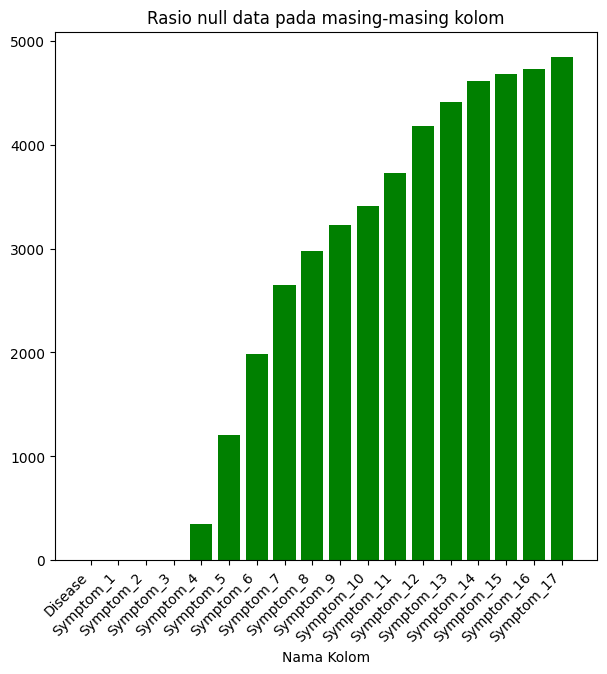

In [12]:
## plot of null value

plt.figure(figsize = (7, 7), dpi = 100)
plt.bar(null_count.index, null_count['jumlah null data'], color = 'green')
plt.xticks(null_count.index, null_count.index, rotation = 45, horizontalalignment = 'right')
plt.title('Rasio null data pada masing-masing kolom')
plt.xlabel('Nama Kolom')
plt.show()

In [13]:
# Rehsape dataframe menjadi array 
kolom = df.columns

data = df[kolom].values.flatten()
reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)
reshaped

df = pd.DataFrame(reshaped, columns = kolom)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Mengisi nilai kosong (NaN) pada setiap kolom menjadi 0
df.fillna(0, inplace = True)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Menghapus tanda "_" di symtom-severity.csv pada semua nilai di masing-masing kolom menjadi " " (spasi)
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head(10)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
5,chills,3
6,joint pain,3
7,stomach pain,5
8,acidity,3
9,ulcers on tongue,4


In [16]:
print(f"Total Symptom: {len(df1.Symptom.unique())}")
for i in range(len(df1.Symptom.unique())):
    print(f"{i+1}. {df1.Symptom.unique()[i]}")

# df1['Symptom'].unique()

Total Symptom: 132
1. itching
2. skin rash
3. nodal skin eruptions
4. continuous sneezing
5. shivering
6. chills
7. joint pain
8. stomach pain
9. acidity
10. ulcers on tongue
11. muscle wasting
12. vomiting
13. burning micturition
14. spotting urination
15. fatigue
16. weight gain
17. anxiety
18. cold hands and feets
19. mood swings
20. weight loss
21. restlessness
22. lethargy
23. patches in throat
24. irregular sugar level
25. cough
26. high fever
27. sunken eyes
28. breathlessness
29. sweating
30. dehydration
31. indigestion
32. headache
33. yellowish skin
34. dark urine
35. nausea
36. loss of appetite
37. pain behind the eyes
38. back pain
39. constipation
40. abdominal pain
41. diarrhoea
42. mild fever
43. yellow urine
44. yellowing of eyes
45. acute liver failure
46. fluid overload
47. swelling of stomach
48. swelled lymph nodes
49. malaise
50. blurred and distorted vision
51. phlegm
52. throat irritation
53. redness of eyes
54. sinus pressure
55. runny nose
56. congestion
57. ch

In [17]:
# Menguba nama gejala menjadi nilai bobot yang tetera pada symptom-severity.csv

bobot = df.values # Menyimpan nilai dari dataset.csv
symptoms = df1['Symptom'].unique() # Menyimpan nama-nama gejala yang ada pada variabel symptoms

for i in range(len(symptoms)): # membuat perulangan berdasarkan panajang data dari variabel symptom
    bobot[bobot == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0] # mengubah nilai dari gejala menjadi bobot

In [18]:
# membuat dataFrame baru yang sudah gejala penyakit sudah diganti menjadi bobot
df = pd.DataFrame(bobot, columns = kolom)
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,5,3,5,6,4,4,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,6,4,foul smell of urine,6,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# mengganti beberapa gejala yang tidak memiliki bobot menjadi 0

df = df.replace('dischromic  patches', 0)
df = df.replace('spotting  urination', 0)
df = df.replace('foul smell of urine', 0)

In [20]:
x = df.iloc[:, 1:].values # Menyimpan nilai Feature (Symptom) dari dataset.csv
y = df.Disease.values # Menyimpan nilai Target (Disease) dari dataset.csv

In [21]:
# Splitting data Traind an testing
# Train data 80%
# Testing data 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)
xtrain = X_train
ytrain = y_train
xtest = X_test
ytest = y_test

In [22]:
# menampilkan shape masing-masing data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3936, 17) (3936,) (984, 17) (984,)


In [23]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)

In [24]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [25]:
#convert integers to dummy variables (i.e. one hot encoded)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(17, input_dim = 17, activation = 'relu'),
    tf.keras.layers.Dense(34, activation = 'relu'),
    tf.keras.layers.Dense(34, activation = 'relu'),
    tf.keras.layers.Dense(68, activation = 'relu'),
    tf.keras.layers.Dense(68, activation = 'relu'),
    tf.keras.layers.Dense(136, activation = 'relu'),
    tf.keras.layers.Dense(136, activation = 'relu'),
    tf.keras.layers.Dense(272, activation = 'relu'),
    tf.keras.layers.Dense(272, activation = 'relu'),
    tf.keras.layers.Dense(41, activation = 'sigmoid'),
])

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape = [17]),
#     tf.keras.layers.Dense(17, activation = 'relu'),
#     tf.keras.layers.Dense(17, activation = 'relu'),
#     tf.keras.layers.Dense(34, activation = 'relu'),
#     tf.keras.layers.Dense(34, activation = 'relu'),
#     tf.keras.layers.Dense(68, activation = 'relu'),
#     tf.keras.layers.Dense(68, activation = 'relu'),
#     tf.keras.layers.Dense(136, activation = 'relu'),
#     tf.keras.layers.Dense(136, activation = 'relu'),
#     tf.keras.layers.Dense(41, activation = 'sigmoid'),
# ])

In [27]:
# adam = Adam(learning_rate = 0.005)
# Compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                306       
                                                                 
 dense_1 (Dense)             (None, 34)                612       
                                                                 
 dense_2 (Dense)             (None, 34)                1190      
                                                                 
 dense_3 (Dense)             (None, 68)                2380      
                                                                 
 dense_4 (Dense)             (None, 68)                4692      
                                                                 
 dense_5 (Dense)             (None, 136)               9384      
                                                                 
 dense_6 (Dense)             (None, 136)               1

In [30]:
file_path = "mlp.h5"
check_point = ModelCheckpoint(file_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")
early_stop = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)

history = model.fit(x = X_train, 
          y = y_train, 
          epochs = 100,
          validation_data = (X_test, y_test), 
          verbose=1,
          callbacks=[check_point, early_stop])


Epoch 1/100
121/123 [============================>.] - ETA: 0s - loss: 2.1719 - accuracy: 0.3678
Epoch 1: val_accuracy improved from -inf to 0.67581, saving model to mlp.h5
123/123 [==============================] - 3s 14ms/step - loss: 2.1581 - accuracy: 0.3717 - val_loss: 1.1825 - val_accuracy: 0.6758
Epoch 2/100
113/123 [==========================>...] - ETA: 0s - loss: 0.7708 - accuracy: 0.7718
Epoch 2: val_accuracy improved from 0.67581 to 0.81402, saving model to mlp.h5
123/123 [==============================] - 1s 10ms/step - loss: 0.7510 - accuracy: 0.7800 - val_loss: 0.6185 - val_accuracy: 0.8140
Epoch 3/100
123/123 [==============================] - ETA: 0s - loss: 0.4457 - accuracy: 0.8702
Epoch 3: val_accuracy improved from 0.81402 to 0.84756, saving model to mlp.h5
123/123 [==============================] - 1s 6ms/step - loss: 0.4457 - accuracy: 0.8702 - val_loss: 0.5056 - val_accuracy: 0.8476
Epoch 4/100
114/123 [==========================>...] - ETA: 0s - loss: 0.2927 - 

In [31]:
predictions = model.predict(X_test[:1])

predictions = label_encoder.inverse_transform(np.argmax(predictions, 1))

print(predictions)

['Hypertension']


In [32]:
model.save("mlp.h5")

In [ ]:
# modelnew = tf.keras.models.load_model("DiseasePrediction.h5")

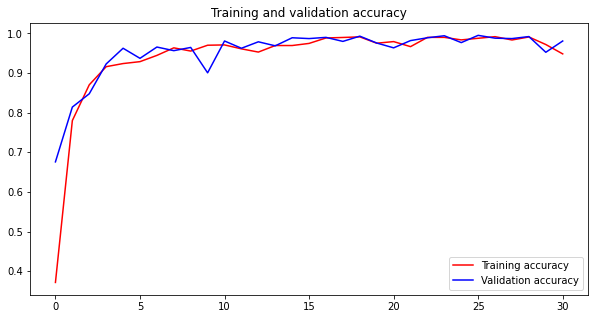

In [33]:
# Visualize Loss & Accuracy

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize = (10, 5))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

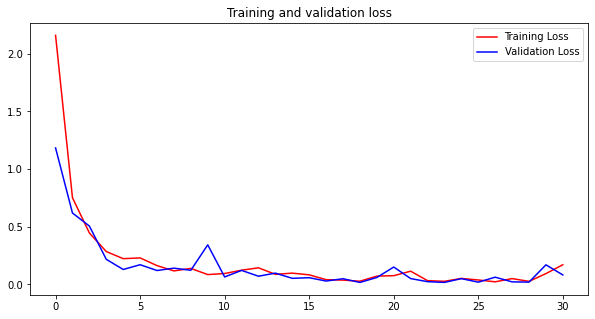

In [34]:
plt.figure(figsize = (10, 5))
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [35]:
def performance_evaluator(model, X_test, y_test):
    """
    params
    model: Load the trained model
    X_test: test data
    y_test: Actual value 
    """ 
    y_test = y_test.argmax(axis=1)
    y_predicted = np.argmax(model.predict(X_test), axis=-1)
    precision = precision_score(y_test, y_predicted,average='micro')*100
    accuracy = accuracy_score(y_test, y_predicted)*100
    f1 = f1_score(y_test, y_predicted, average='macro')*100
    recall = recall_score(y_test, y_predicted, average='macro')*100
    print('precision----->', precision) 
    print('\n************************')
    print('Accuracy----->', accuracy)
    print('\n************************')
    print('F1 Score----->', f1)
    print('\n************************')
    print('Recall----->', recall)
    print('\n************************')
    return accuracy, precision, f1, recall

In [36]:
import seaborn as sns
def confusion_plot(model, X_test, y_test):
    """
    to plot confusion metrix
    """
    plt.figure(figsize=(10, 10), dpi=150)
    y_pred = model.predict(X_test)
    con_me = confusion_matrix(y_test, y_pred)
    sns.heatmap(con_me, annot=True)

In [177]:
result_y = np.argmax(model.predict(X_test), axis=-1)
con_m_mlp = confusion_matrix(y_test.argmax(axis=1), result_y)

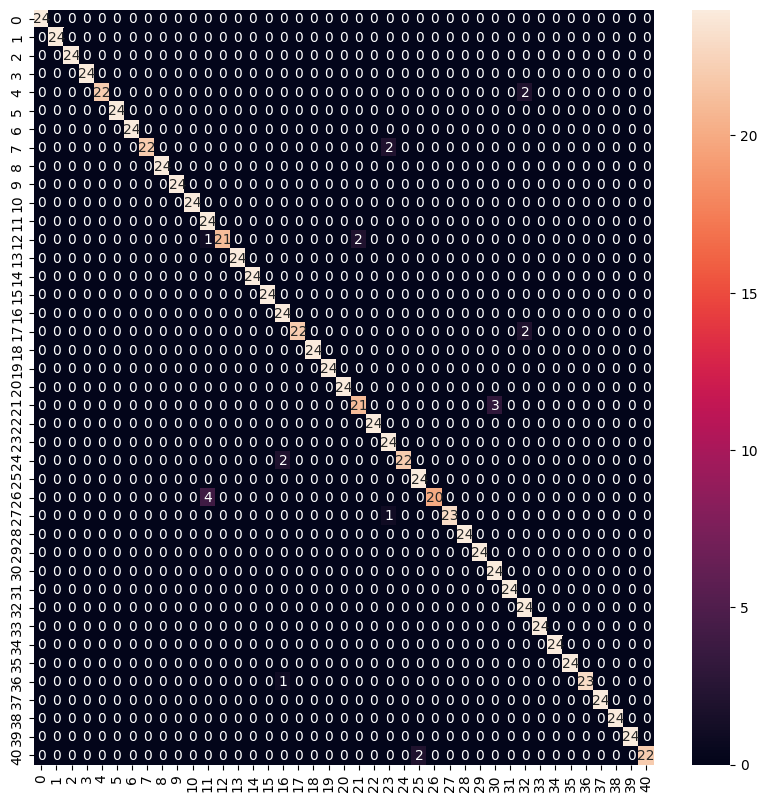

In [178]:
plt.figure(figsize = (10, 10), dpi = 100)
sns.heatmap(con_m_mlp, annot=True, fmt='g')

In [47]:
performance_evaluator(model, X_test, y_test)

precision-----> 99.39024390243902

************************
Accuracy-----> 99.39024390243902

************************
F1 Score-----> 99.39717860475116

************************
Recall-----> 99.39024390243902

************************


(99.39024390243902, 99.39024390243902, 99.39717860475116, 99.39024390243902)

# MLP Model 2

In [81]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(17, input_dim = 17, activation = 'relu'),
    tf.keras.layers.Dense(34, activation = 'relu'),
    tf.keras.layers.Dense(34, activation = 'relu'),
    tf.keras.layers.Dense(68, activation = 'relu'),
    tf.keras.layers.Dense(68, activation = 'relu'),
    tf.keras.layers.Dense(136, activation = 'relu'),
    tf.keras.layers.Dense(136, activation = 'relu'),
    tf.keras.layers.Dense(272, activation = 'relu'),
    tf.keras.layers.Dense(272, activation = 'relu'),
    tf.keras.layers.Dense(41, activation = 'sigmoid'),
])


In [82]:
# adam = Adam(learning_rate = 0.005)
# Compile model
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 17)                306       
                                                                 
 dense_69 (Dense)            (None, 34)                612       
                                                                 
 dense_70 (Dense)            (None, 34)                1190      
                                                                 
 dense_71 (Dense)            (None, 68)                2380      
                                                                 
 dense_72 (Dense)            (None, 68)                4692      
                                                                 
 dense_73 (Dense)            (None, 136)               9384      
                                                                 
 dense_74 (Dense)            (None, 136)              

In [83]:
file_path = "mlp2.h5"
check_point = ModelCheckpoint(file_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")
early_stop = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)

history = model2.fit(
                     x = X_train, 
                     y = y_train, 
                     epochs = 100,
                     validation_data = (X_test, y_test), 
                     verbose=1,
                     callbacks=[check_point, early_stop])

Epoch 1/100
114/123 [==========================>...] - ETA: 0s - loss: 2.3284 - accuracy: 0.3062
Epoch 1: val_accuracy improved from -inf to 0.62602, saving model to mlp2.h5
123/123 [==============================] - 2s 8ms/step - loss: 2.2486 - accuracy: 0.3265 - val_loss: 1.1474 - val_accuracy: 0.6260
Epoch 2/100
122/123 [============================>.] - ETA: 0s - loss: 0.7932 - accuracy: 0.7725
Epoch 2: val_accuracy improved from 0.62602 to 0.79472, saving model to mlp2.h5
123/123 [==============================] - 1s 6ms/step - loss: 0.7933 - accuracy: 0.7718 - val_loss: 0.6230 - val_accuracy: 0.7947
Epoch 3/100
118/123 [===========================>..] - ETA: 0s - loss: 0.4707 - accuracy: 0.8557
Epoch 3: val_accuracy improved from 0.79472 to 0.88516, saving model to mlp2.h5
123/123 [==============================] - 1s 6ms/step - loss: 0.4717 - accuracy: 0.8539 - val_loss: 0.4310 - val_accuracy: 0.8852
Epoch 4/100
120/123 [============================>.] - ETA: 0s - loss: 0.3241 -

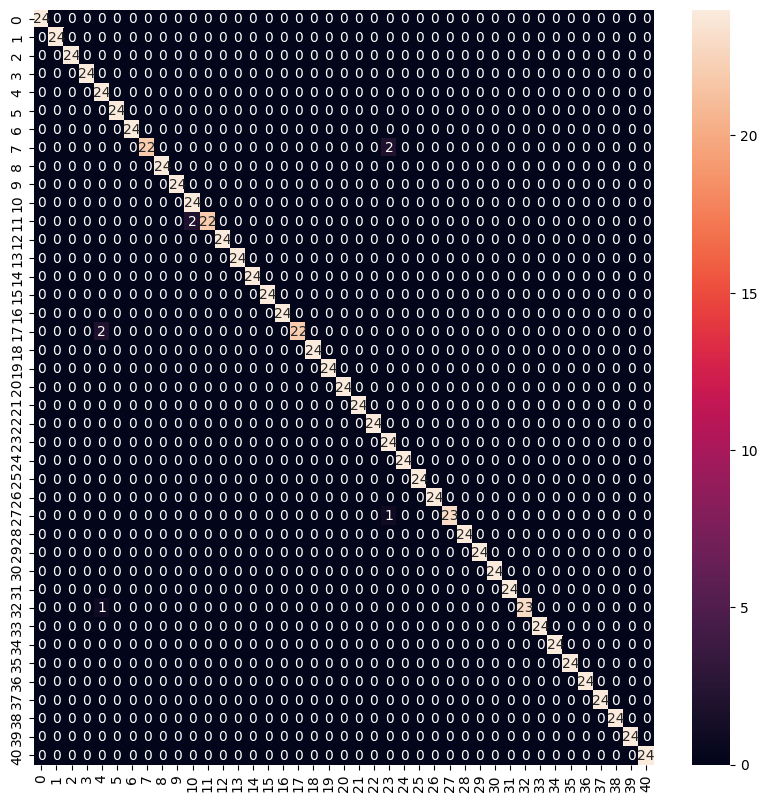

In [148]:
result_y = np.argmax(model2.predict(X_test), axis=-1)
con_m_mlp = confusion_matrix(y_test.argmax(axis=1), result_y)
plt.figure(figsize = (10, 10), dpi = 100)
sns.heatmap(con_m_mlp, annot=True, fmt='g')

In [149]:
performance_evaluator(model2, X_test, y_test)

precision-----> 99.1869918699187

************************
Accuracy-----> 99.1869918699187

************************
F1 Score-----> 99.19357309043514

************************
Recall-----> 99.1869918699187

************************


(99.1869918699187, 99.1869918699187, 99.19357309043514, 99.1869918699187)

In [86]:
model2.save("mlp2.h5")

# Model 3

In [120]:
p = {'first_neuron':[9, 10, 11],
     'hidden_layers':[0, 1, 2],
     'batch_size': [30],
     'epochs': [100],
     'dropout': [0],
     'kernel_initializer': ['uniform','normal'],
     'optimizer': ['Nadam', 'Adam'],
     'losses': ['binary_crossentropy'],
     'activation':['relu', 'elu'],
     'last_activation': ['sigmoid']}

In [121]:
def mlp(x_train, y_train, x_val, y_val, params):

    # next we can build the model exactly like we would normally do it
    model = Sequential()
    model.add(Dense(17, input_dim=x_train.shape[1],
                    activation=params['activation'],
                    kernel_initializer='normal'))
    
    model.add(Dropout(params['dropout']))
    
    # if we want to also test for number of layers and shapes, that's possible
    model.add(Dense(34,
                    activation=params['activation'],
                    kernel_initializer='normal'))
    
    model.add(Dense(34,
                    activation=params['activation'],
                    kernel_initializer='normal'))
    
    model.add(Dense(68,
                    activation=params['activation'],
                    kernel_initializer='normal'))
    
    model.add(Dense(68,
                    activation=params['activation'],
                    kernel_initializer='normal'))    
    
    model.add(Dense(136,
                    activation=params['activation'],
                    kernel_initializer='normal'))
    
    model.add(Dense(136,
                    activation=params['activation'],
                    kernel_initializer='normal'))
    
    model.add(Dense(272,
                    activation=params['activation'],
                    kernel_initializer='normal'))
    
    model.add(Dense(272,
                    activation=params['activation'],
                    kernel_initializer='normal'))  
   
    # then we finish again with completely standard Keras way
    model.add(Dense(41, activation=params['last_activation'],
                    kernel_initializer='normal'))
    
    model.compile(loss=params['losses'],
                  # here we add a regulizer normalization function from Talos
                  optimizer=params['optimizer'],
                  metrics=['acc', talos.utils.metrics.f1score])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0)
    
    # finally we have to make sure that history object and model are returned
    return history, model

In [123]:
t = talos.Scan(x=X_train,
               y=y_train,
               model=mlp,
               params=p,
               experiment_name='healthcare',
               round_limit=50)



  0%|          | 0/50 [03:54<?, ?it/s]


  2%|▏         | 1/50 [01:26<1:10:38, 86.50s/it]

  4%|▍         | 2/50 [02:20<53:41, 67.11s/it]  

  6%|▌         | 3/50 [03:18<49:17, 62.93s/it]

  8%|▊         | 4/50 [04:21<48:21, 63.07s/it]

 10%|█         | 5/50 [05:13<44:25, 59.24s/it]

 12%|█▏        | 6/50 [06:37<49:26, 67.42s/it]

 14%|█▍        | 7/50 [08:00<52:02, 72.62s/it]

 16%|█▌        | 8/50 [09:25<53:31, 76.46s/it]

 18%|█▊        | 9/50 [10:18<47:15, 69.17s/it]

 20%|██        | 10/50 [11:42<49:16, 73.92s/it]

 22%|██▏       | 11/50 [13:07<50:10, 77.20s/it]

 24%|██▍       | 12/50 [13:56<43:28, 68.66s/it]

 26%|██▌       | 13/50 [15:19<45:05, 73.13s/it]

 28%|██▊       | 14/50 [16:44<45:58, 76.61s/it]

 30%|███       | 15/50 [17:36<40:17, 69.06s/it]

 32%|███▏      | 16/50 [18:59<41:33, 73.34s/it]

 34%|███▍      | 17/50 [20:24<42:12, 76.75s/it]

 36%|███▌      | 18/50 [21:48<42:12, 79.14s/it]

 38%|███▊      | 19/50 [22:40<36:36, 70.86s/it]

 40%|████      | 20/50 [23:42<3

In [125]:
t.data

,start,end,duration,round_epochs,loss,acc,f1score,val_loss,val_acc,val_f1score,first_neuron,hidden_layers,batch_size,epochs,dropout,kernel_initializer,optimizer,losses,activation,last_activation
0,07/26/22-134431,07/26/22-134557,85.987975,100,0.012643,0.909619,0.901462,0.013108,0.895851,0.910514,11,2,30,100,0,normal,Nadam,binary_crossentropy,elu,sigmoid
1,07/26/22-134557,07/26/22-134651,53.198768,100,0.003546,0.974592,0.971470,0.020614,0.886537,0.877686,10,2,30,100,0,normal,Adam,binary_crossentropy,elu,sigmoid
2,07/26/22-134651,07/26/22-134749,57.650396,100,0.016756,0.888566,0.881910,0.025580,0.801016,0.779283,10,0,30,100,0,normal,Nadam,binary_crossentropy,relu,sigmoid
3,07/26/22-134749,07/26/22-134852,62.917433,100,0.005231,0.963339,0.959859,0.009922,0.935648,0.910407,11,0,30,100,0,uniform,Nadam,binary_crossentropy,elu,sigmoid
4,07/26/22-134852,07/26/22-134944,52.117366,100,0.009736,0.948094,0.938792,0.013702,0.922100,0.919833,10,2,30,100,0,uniform,Adam,binary_crossentropy,elu,sigmoid
5,07/26/22-134945,07/26/22-135108,82.958537,100,0.003774,0.978221,0.971219,0.013443,0.930567,0.929376,9,0,30,100,0,normal,Adam,binary_crossentropy,elu,sigmoid
6,07/26/22-135108,07/26/22-135231,82.966384,100,0.005509,0.972777,0.967869,0.023628,0.852667,0.844155,11,2,30,100,0,uniform,Adam,binary_crossentropy,elu,sigmoid
7,07/26/22-135231,07/26/22-135356,84.203822,100,0.021889,0.856624,0.845176,0.020080,0.857748,0.864649,9,1,30,100,0,normal,Nadam,binary_crossentropy,relu,sigmoid
8,07/26/22-135356,07/26/22-135449,52.745517,100,0.008955,0.949546,0.941095,0.003713,0.979678,0.977820,11,1,30,100,0,uniform,Adam,binary_crossentropy,elu,sigmoid
9,07/26/22-135449,07/26/22-135613,84.233584,100,0.016195,0.886388,0.875688,0.018293,0.854361,0.866061,9,2,30,100,0,normal,Nadam,binary_crossentropy,relu,sigmoid


In [129]:
t.best_model(metric='f1score', asc=False)

In [133]:
t.details

experiment_name              healthcare
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
experiment_id              072622134431
complete_time            07/26/22/14:41
x_shape                      (3936, 17)
y_shape                      (3936, 41)
dtype: object

In [156]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(272, input_dim = 17, activation = 'elu'),
    tf.keras.layers.Dense(34, activation = 'relu'),
    tf.keras.layers.Dense(34, activation = 'relu'),
    tf.keras.layers.Dense(68, activation = 'relu'),
    tf.keras.layers.Dense(68, activation = 'relu'),
    tf.keras.layers.Dense(136, activation = 'relu'),
    tf.keras.layers.Dense(136, activation = 'relu'),
    tf.keras.layers.Dense(272, activation = 'relu'),
    tf.keras.layers.Dense(272, activation = 'relu'),
    tf.keras.layers.Dense(41, activation = 'sigmoid'),
])


In [157]:
# Compile model
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 272)               4896      
                                                                 
 dense_21 (Dense)            (None, 34)                9282      
                                                                 
 dense_22 (Dense)            (None, 34)                1190      
                                                                 
 dense_23 (Dense)            (None, 68)                2380      
                                                                 
 dense_24 (Dense)            (None, 68)                4692      
                                                                 
 dense_25 (Dense)            (None, 136)               9384      
                                                                 
 dense_26 (Dense)            (None, 136)              

In [158]:
file_path = "mlp3.h5"
check_point = ModelCheckpoint(file_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")
early_stop = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)

history3 = model3.fit(x = X_train, 
          y = y_train, 
          epochs = 100,
          batch_size = 30,
          validation_data = (X_test, y_test), 
          verbose=1,
          callbacks=[check_point, early_stop])

Epoch 1/100
124/132 [===========================>..] - ETA: 0s - loss: 2.1272 - accuracy: 0.3481
Epoch 1: val_accuracy improved from -inf to 0.65752, saving model to mlp3.h5
132/132 [==============================] - 2s 8ms/step - loss: 2.0772 - accuracy: 0.3646 - val_loss: 1.0863 - val_accuracy: 0.6575
Epoch 2/100
123/132 [==========================>...] - ETA: 0s - loss: 0.7710 - accuracy: 0.7509
Epoch 2: val_accuracy improved from 0.65752 to 0.83638, saving model to mlp3.h5
132/132 [==============================] - 1s 6ms/step - loss: 0.7573 - accuracy: 0.7558 - val_loss: 0.5486 - val_accuracy: 0.8364
Epoch 3/100
124/132 [===========================>..] - ETA: 0s - loss: 0.4858 - accuracy: 0.8473
Epoch 3: val_accuracy improved from 0.83638 to 0.87398, saving model to mlp3.h5
132/132 [==============================] - 1s 7ms/step - loss: 0.4828 - accuracy: 0.8468 - val_loss: 0.3779 - val_accuracy: 0.8740
Epoch 4/100
129/132 [============================>.] - ETA: 0s - loss: 0.3539 -

In [159]:
model3.save("mlp3.h5")

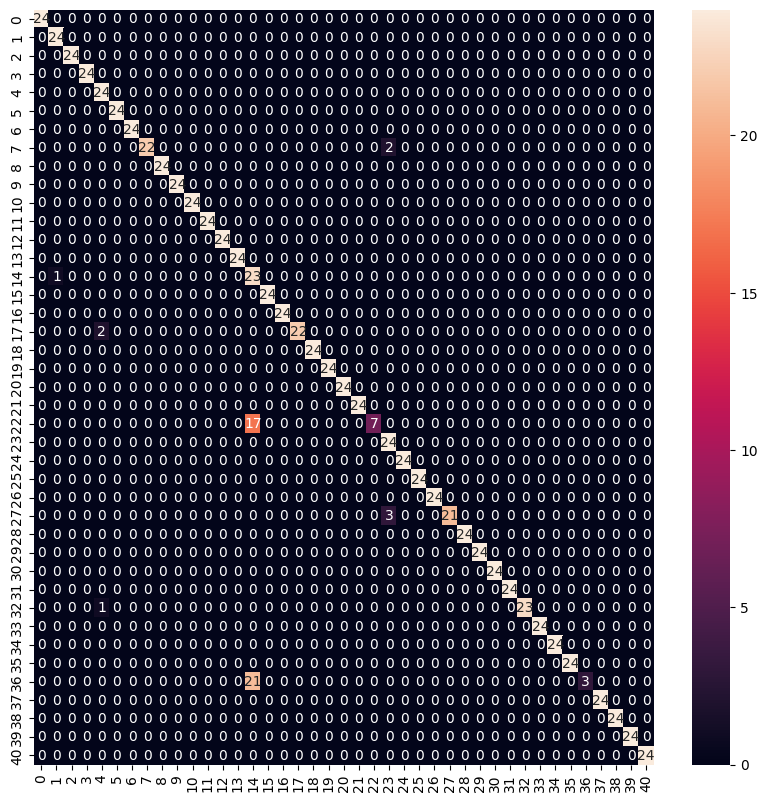

In [160]:
result_y = np.argmax(model3.predict(X_test), axis=-1)
con_m_mlp = confusion_matrix(y_test.argmax(axis=1), result_y)
plt.figure(figsize = (10, 10), dpi = 100)
sns.heatmap(con_m_mlp, annot=True, fmt='g')

In [161]:
performance_evaluator(model3, X_test, y_test)

precision-----> 95.22357723577237

************************
Accuracy-----> 95.22357723577237

************************
F1 Score-----> 94.79644023552977

************************
Recall-----> 95.22357723577235

************************


(95.22357723577237, 95.22357723577237, 94.79644023552977, 95.22357723577235)

# ENSEMBLE

In [165]:
keras_model = load_model('mlp.h5', compile=False)
keras_model._name = 'mlp1'
keras_model2 = load_model('mlp2.h5', compile=False)
keras_model2._name = 'mlp2'
keras_model3 = load_model('mlp3.h5', compile=False)
keras_model3._name = 'mlp3'

In [167]:
models = [keras_model, keras_model2, keras_model3]

In [170]:
model_input = Input(shape=(17,))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output)
ensemble_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
ensemble_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 mlp1 (Sequential)              (None, 41)           159909      ['input_3[0][0]']                
                                                                                                  
 mlp2 (Sequential)              (None, 41)           159909      ['input_3[0][0]']                
                                                                                                  
 mlp3 (Sequential)              (None, 41)           173169      ['input_3[0][0]']                
                                                                                              

In [171]:
file_path = "ensemble.h5"
check_point = ModelCheckpoint(file_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")
early_stop = EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
ensemble_history =  ensemble_model.fit(X_train, 
                      y_train, 
                      batch_size=30, 
                      epochs=100, 
                      validation_split=0.12,
                      verbose=1,
                      callbacks=[check_point, early_stop])

Epoch 1/100
115/116 [============================>.] - ETA: 0s - loss: 0.2519 - accuracy: 0.9516
Epoch 1: val_accuracy improved from -inf to 0.93658, saving model to ensemble.h5
116/116 [==============================] - 5s 21ms/step - loss: 0.2514 - accuracy: 0.9512 - val_loss: 0.2681 - val_accuracy: 0.9366
Epoch 2/100
113/116 [============================>.] - ETA: 0s - loss: 0.1193 - accuracy: 0.9569
Epoch 2: val_accuracy improved from 0.93658 to 0.96617, saving model to ensemble.h5
116/116 [==============================] - 1s 13ms/step - loss: 0.1181 - accuracy: 0.9573 - val_loss: 0.1501 - val_accuracy: 0.9662
Epoch 3/100
114/116 [============================>.] - ETA: 0s - loss: 0.1176 - accuracy: 0.9670
Epoch 3: val_accuracy did not improve from 0.96617
116/116 [==============================] - 1s 12ms/step - loss: 0.1208 - accuracy: 0.9659 - val_loss: 0.3261 - val_accuracy: 0.9619
Epoch 4/100
114/116 [============================>.] - ETA: 0s - loss: 0.0967 - accuracy: 0.9751


In [179]:
performance_evaluator(ensemble_model, X_test, y_test)

precision-----> 99.39024390243902

************************
Accuracy-----> 99.39024390243902

************************
F1 Score-----> 99.39717860475116

************************
Recall-----> 99.39024390243902

************************


(99.39024390243902, 99.39024390243902, 99.39717860475116, 99.39024390243902)

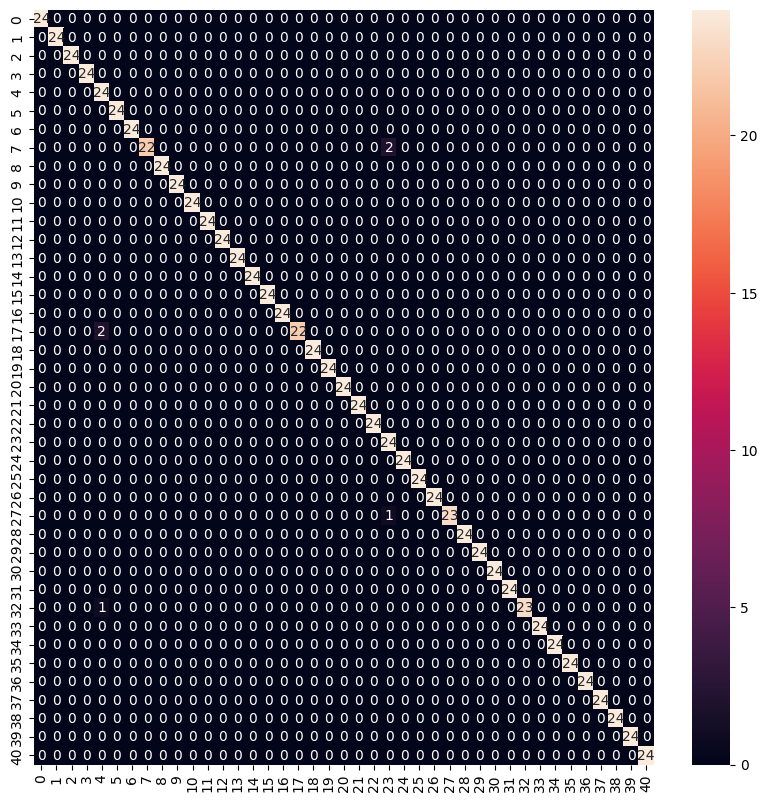

In [173]:
result_y_mlp2 = np.argmax(ensemble_model.predict(X_test), axis=-1)
con_m_mlp2 = confusion_matrix(y_test.argmax(axis=1), result_y_mlp2)
plt.figure(figsize = (10, 10), dpi = 100)
sns.heatmap(con_m_mlp2, annot=True, fmt='g')

984

### Tes prediksi model Tensorflow Keras

In [ ]:
# Memprediksi penyaskit menggunakan x_test[1]
pred = model.predict(X_test[0:1])
predictions = label_encoder.inverse_transform(np.argmax(pred, 1))
print(f"The Disease is: {predictions[0]} \n")

description = df2.loc[[predictions[0]], 'Description'].values
print(f"Disease Description: \n- {description[0]} \n")

precaution = df3.loc[[str(predictions[0])], ['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values
print("Precaution: ")
for i in range(4):
    print("-", precaution[0][i])

The Disease is: Hypertension 

Disease Description: 
- Hypertension (HTN or HT), also known as high blood pressure (HBP), is a long-term medical condition in which the blood pressure in the arteries is persistently elevated. High blood pressure typically does not cause symptoms. 

Precaution: 
- meditation
- salt baths
- reduce stress
- get proper sleep


In [ ]:
# Memprediksi penyaskit menggunakan x_test[1]
pred = model.predict(X_test[1:2])
predictions = label_encoder.inverse_transform(np.argmax(pred, 1))
print(f"The Disease is: {predictions[0]} \n")

description = df2.loc[[predictions[0]], 'Description'].values
print(f"Disease Description: \n- {description[0]} \n")

precaution = df3.loc[[str(predictions[0])], ['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values
print("Precaution: ")
for i in range(4):
    print("-", precaution[0][i])

The Disease is: Drug Reaction 

Disease Description: 
- An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs. 

Precaution: 
- stop irritation
- consult nearest hospital
- stop taking drug
- follow up


In [ ]:
# Memprediksi penyaskit menggunakan x_test[1]
pred = model.predict(X_test[2:3])
predictions = label_encoder.inverse_transform(np.argmax(pred, 1))
print(f"The Disease is: {predictions[0]} \n")

description = df2.loc[[predictions[0]], 'Description'].values
print(f"Disease Description: \n- {description[0]} \n")

precaution = df3.loc[[str(predictions[0])], ['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values
print("Precaution: ")
for i in range(4):
    print("-", precaution[0][i])

The Disease is: Dimorphic hemmorhoids(piles) 

Disease Description: 
- Hemorrhoids, also spelled haemorrhoids, are vascular structures in the anal canal. In their ... Other names, Haemorrhoids, piles, hemorrhoidal disease . 

Precaution: 
- avoid fatty spicy food
- consume witch hazel
- warm bath with epsom salt
- consume alovera juice
